# Data Munging

In [ ]:
!pip3 install pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 8.6 MB/s 


In [ ]:
# Importing libraries 
import numpy as np 
import pandas as pd
import janitor

# !pip3 install pyjanitor # run this once

import sklearn 
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('data/mushroom_clean.csv')

In [ ]:
data

,Unnamed: 0,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,2,7,7,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,2,7,7,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,2,7,7,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,2,7,7,2,1,4,2,3,5
4,4,0,5,2,3,0,5,1,1,0,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,0,3,2,4,0,5,0,0,0,...,2,2,5,5,1,1,4,0,1,2
8120,8120,0,5,2,4,0,5,0,0,0,...,2,2,5,5,0,1,4,0,4,2
8121,8121,0,2,2,4,0,5,0,0,0,...,2,2,5,5,1,1,4,0,1,2
8122,8122,1,3,3,4,0,8,1,0,1,...,2,1,7,7,2,1,0,7,4,2


# Visualization

In [ ]:
data['cap_shape'].unique()

array([5, 0, 4, 2, 3, 1])

In [ ]:
len(data[data['cap_shape']==5])

3656

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
l=data['cap_shape'].value_counts()

In [ ]:
l

5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap_shape, dtype: int64

In [ ]:
# dic={0:'bell',1:'conical',2:'convex',3:'flat',4:'knobbed',5:'sunken'}
dic={5:'sunken',2:'convex',3:'flat',0:'bell',4:'knobbed',1:'conical'}

<BarContainer object of 6 artists>

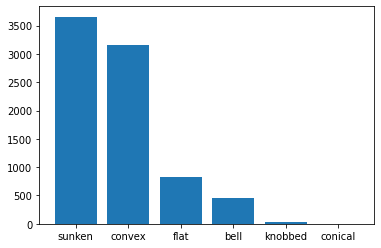

In [ ]:
plt.bar(list(dic.values()),l)

In [ ]:
l1=data['cap_surface'].value_counts()

In [ ]:
l1

3    3244
2    2556
0    2320
1       4
Name: cap_surface, dtype: int64

In [ ]:
dic1 ={3:'smooth',2:'scaly',0:'fibrous',1:'grooves'}

<BarContainer object of 4 artists>

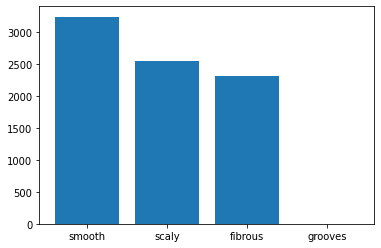

In [ ]:
plt.bar(list(dic1.values()),l1)

In [ ]:
data['cap_color'].value_counts()

4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap_color, dtype: int64

In [ ]:
dic={0:'brown',1:'buff',2:'cinnamon',3:'gray',4:'green',5:'pink',6:'purple',7:'red',8:'white',9:'yellow'}

In [ ]:
data['cap_color']=data['cap_color'].replace(dic)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

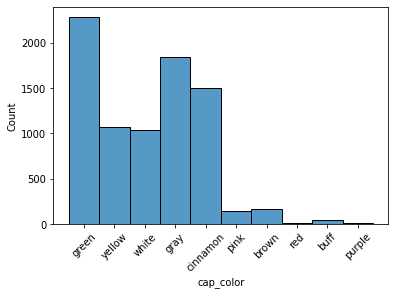

In [ ]:
ax=sns.histplot(data['cap_color'],bins=20)
plt.xticks(rotation=45)

In [ ]:
# def plot_col(col, hue=None, color=['blue', 'purple'], labels=None):
#     fig, ax = plt.subplots(figsize=(15, 7))
#     sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
#     ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
#     if labels!=None:
#         ax.set_xticklabels(labels)
#     if hue!=None:
#         ax.legend(('Poisonous', 'Edible'), loc=0)

In [ ]:
# color_dict = {"purple":"n","yellow":"y", "blue":"w", "violet":"g", "red":"e","pink":"p",
#               "orange":"b", "purple":"u", "black":"c", "green":"r"}
# plot_col(col='cap_color', color=color_dict.keys(), labels=color_dict)

# Model Development
will apply different classification methods to compare the accuracy of prediction of the classification models in predicting whether the mushrooms are edible or poisonous from the training data fed into the model.

In [ ]:
data = pd.read_csv('data/mushroom_clean.csv')

In [ ]:
# Decision Tree
tree = DecisionTreeClassifier()

# training and prediction
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(y_test, tree_pred))
print()
print('Classification Report :\n', classification_report(y_test, tree_pred))

Confusion Matrix :
 [[842   0]
 [  0 783]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# K Nearest Neighbor using Grid Search for n_neighbors
from sklearn.model_selection import train_test_split
x = data.drop(columns=['class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=500)

# training & prediction
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(y_test, lr_pred))
print()
print('Classification Report :\n', classification_report(y_test, lr_pred))

Confusion Matrix :
 [[808  34]
 [ 15 768]]

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       842
           1       0.96      0.98      0.97       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [ ]:
# Random Forest along with Grid Search for n_estimators

# Grid search and training
parameters = {'n_estimators': [100, 200, 300]}
search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5)
search.fit(X_train, y_train)
print(search.best_params_)

# prediction
rfc_pred = search.best_estimator_.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(y_test, rfc_pred))
print()
print('Classification Report :\n', classification_report(y_test, rfc_pred))

{'n_estimators': 100}
Confusion Matrix :
 [[842   0]
 [  0 783]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Support Vector Classifier
svc = SVC()

# training and prediction
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(y_test, svc_pred))
print()
print('Classification Report :\n', classification_report(y_test, svc_pred))

Confusion Matrix :
 [[842   0]
 [  0 783]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Creating a Performance report for all ML Models

classifier_pred = {'Logistic Regression ':lr_pred, 'K Nearest Neighbors':y_pred, 'Decision Tree Classifier':tree_pred,
                   'Random Forest Classifier':rfc_pred, 'Support Vector Classifier':svc_pred}

report = dict()

for key, value in classifier_pred.items():
    # calculating scores 
    accuracy = accuracy_score(y_test, value)
    precision = precision_score(y_test, value)
    recall = recall_score(y_test, value)
    f1 = f1_score(y_test, value)
    # entering scores in report
    report[key] = [accuracy, precision, recall, f1]

# report dataframe
report_df = pd.DataFrame(data=report, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
report_df.index.name = 'ML Model'
report_df

,Accuracy,Precision,Recall,F1 Score
ML Model,,,,
Logistic Regression,0.969846,0.957606,0.980843,0.969085
K Nearest Neighbors,1.000000,1.000000,1.000000,1.000000
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
Support Vector Classifier,1.000000,1.000000,1.000000,1.000000
